### Generating a random variate function from given histogram and retriving same/similar histogram from the random variate function

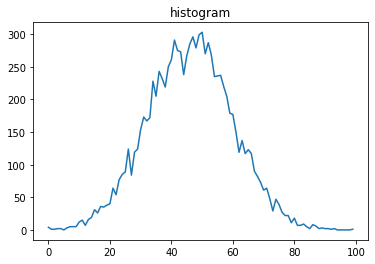

array([  4,   1,   1,   2,   2,   0,   3,   5,   5,   5,  12,  15,   7,
        16,  19,  31,  26,  36,  35,  38,  40,  64,  54,  77,  85,  89,
       124,  84, 119, 124, 154, 173, 167, 172, 228, 205, 243, 232, 219,
       250, 261, 291, 275, 273, 238, 267, 285, 296, 279, 299, 303, 270,
       287, 268, 235, 236, 237, 220, 205, 179, 177, 150, 119, 137, 117,
       123, 117,  90,  82,  73,  61,  64,  48,  29,  47,  39,  27,  22,
        22,  11,  18,   7,   7,   9,   5,   2,   8,   6,   2,   3,   2,
         2,   1,   2,   0,   0,   0,   0,   0,   1], dtype=int64)

In [93]:
from scipy.interpolate import interp1d
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make up some random data
x = np.random.normal(0, 1, 10000)

#Generating histogram
hist = np.histogram(x, bins=100) 
hist_dist = scipy.stats.rv_histogram(hist)

#Plotting the histogram
plt.title("histogram")
plt.plot(hist[0], label='histogram')
plt.show()
hist[0]


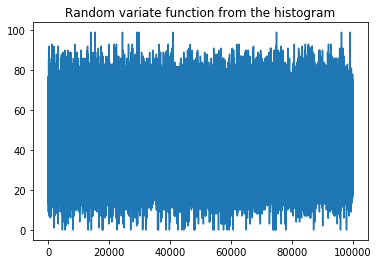

In [99]:
#Defining a RandomVariate function
def RandomVariate(arr, R, N):

    #Return the cumulative sum of the elements along a given axis
    cdf = np.cumsum(arr)
    # Normalise cumulative sum to produce cdf
    cdf = cdf / cdf[-1] 
    #Generating a random variate function
    values = np.random.uniform(0,R,N) 
    #Searchsorted works with real/complex arrays containing nan values
    value_bins = np.searchsorted(cdf, values) 
    value_bins
    
    #Plotting the random variate function from the values of the histogram
    plt.title("Random variate function from the histogram")
    plt.plot(value_bins, label='histogram')
    plt.show()
    return value_bins

value_bins = RandomVariate(hist[0],1,100000)

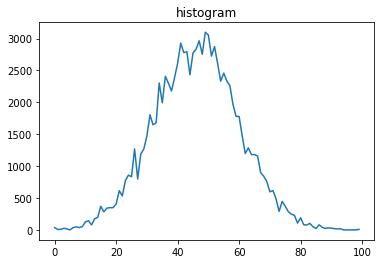

In [100]:
#Plotting the graph from the histogram
import matplotlib.pyplot as plt
%matplotlib inline

hist2 = np.histogram(value_bins, bins=100)
hist_dist = scipy.stats.rv_histogram(hist2)

plt.title("histogram")
plt.plot(hist2[0], label='histogram')
plt.show()